<a href="https://colab.research.google.com/github/rodmart21/Sports_analytics/blob/main/Progressive_Passes_Expected_threat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.5 MB/s eta 0:00:00


### Progressive passes. Article that explains what it means.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [ ]:
df = pd.read_csv('/content/europaFinal.csv')

In [ ]:
df.shape

(2071, 11)

In [ ]:
df.columns

Index(['minute', 'second', 'teamId', 'x', 'y', 'period', 'type', 'outcome',
       'playerId', 'endX', 'endY', 'beginning', 'end'],
      dtype='object')

In [ ]:
df.endY.max()  # Dato rarete este, no hay ni un campo de fútbol tan ancho.

118.68

In [ ]:
df.head(20)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
6,0,35.0,Villarreal,33.6,2.6,FirstHalf,TakeOn,Unsuccessful,8.0,NaN,NaN
7,0,35.0,Manchester United,66.4,97.4,FirstHalf,Tackle,Successful,10.0,NaN,NaN
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4


In [ ]:
df = df.loc[df['teamId']=='Villarreal']

In [ ]:
df = df.loc[df['type']=='Pass']

In [ ]:
df.shape

(501, 11)

In [ ]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5
5,0,34.0,Villarreal,35.1,9.1,FirstHalf,Pass,Successful,7.0,31.9,2.3
8,0,52.0,Villarreal,34.2,0.0,FirstHalf,Pass,Successful,8.0,35.0,10.6
9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4
12,1,5.0,Villarreal,26.1,65.7,FirstHalf,Pass,Successful,4.0,34.0,87.1


In [ ]:
df_1 = df.loc[df['playerId']==5.0]

In [ ]:
df_1.shape

(62, 11)

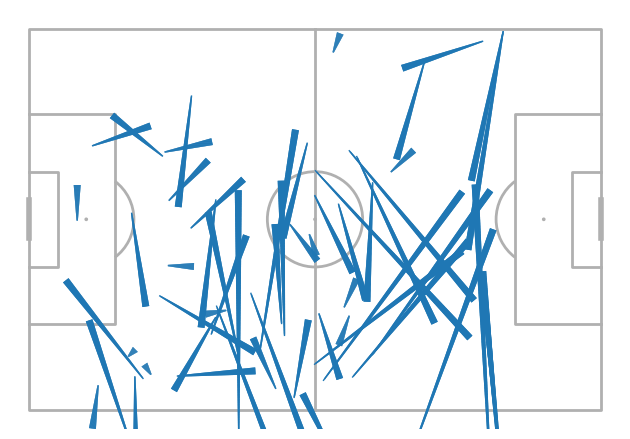

In [ ]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()
pitch.lines(df_1.x,df_1.y,df_1.endX,df_1.endY,comet=True,ax=ax)

In [ ]:
df = df.loc[df['progressive']==True].reset_index()

In [ ]:
# Cálculos para que las coordenadas estén a escala.
df.x = df.x*1.2
df.y = df.y*.8
df.endX = df.endX*1.2
df.endY = df.endY*1.2

In [ ]:
# Ejemplo para un pase concreto:
a=df_1.loc[9]
a['beginning'] = np.sqrt(np.square(120-a['x']) + np.square(40-a['y']))
a['end'] = np.sqrt(np.square(120-a['endX']) + np.square(40-a['endY']))
a['progressive'] = [(a['end']) / (a['beginning']) < .75]

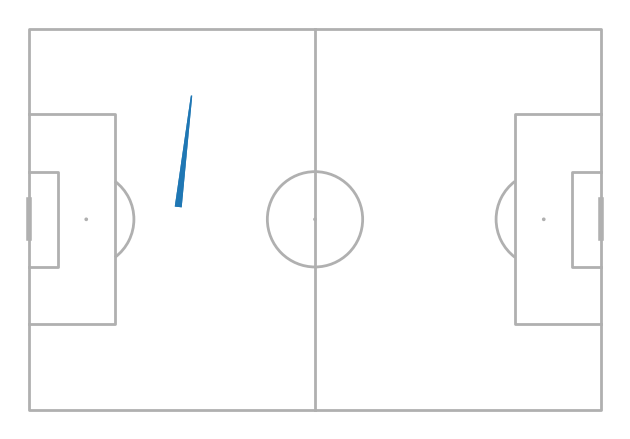

In [ ]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()
pitch.lines(a.x,a.y,a.endX,a.endY,comet=True,ax=ax)

### Lo que estás calculando es la distancia a la portería contraria. Esta portería se encuentra en x=120 e y=40 (el centro de la portería).

In [ ]:
df_1.reset_index()

,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,9,0,54.0,Villarreal,34.1,14.0,FirstHalf,Pass,Successful,5.0,31.3,37.4,89.748593,88.738098,False
1,22,1,42.0,Villarreal,44.1,69.4,FirstHalf,Pass,Successful,5.0,37.6,38.5,81.395147,82.413652,False
2,31,2,1.0,Villarreal,54.7,41.0,FirstHalf,Pass,Unsuccessful,5.0,60.5,48.7,65.307657,60.132687,False
3,105,5,25.0,Villarreal,35.2,88.4,FirstHalf,Pass,Successful,5.0,42.5,98.9,97.640156,97.341975,False
4,136,7,2.0,Villarreal,14.5,74.8,FirstHalf,Pass,Successful,5.0,13.3,83.9,111.091359,115.378074,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1838,107,56.0,Villarreal,67.1,25.5,SecondPeriodOfExtraTime,Pass,Unsuccessful,5.0,93.4,57.0,54.851253,31.568339,True
58,1879,111,28.0,Villarreal,51.8,75.6,SecondPeriodOfExtraTime,Pass,Successful,5.0,47.0,64.9,76.932438,77.129826,False
59,1883,111,42.0,Villarreal,53.6,64.5,SecondPeriodOfExtraTime,Pass,Successful,5.0,52.9,31.9,70.775773,67.587129,False
60,1967,119,53.0,Villarreal,39.3,88.3,SecondPeriodOfExtraTime,Pass,Successful,5.0,39.9,97.1,94.049880,98.368796,False


In [ ]:
df_1['progressive'] = (df_1['end'] / df_1['beginning']) < 0.75


In [ ]:
df_1['beginning'] = np.sqrt(np.square(120 - df_1['x']) + np.square(40 - df_1['y']))
df_1['end'] = np.sqrt(np.square(120 - df_1['endX']) + np.square(40 - df_1['endY']))
#df_1['progressive'] = [(df_1['end'][x]) / (df_1['beginning'][x]) < .75 for x in range(len(df_1.beginning))]
df_1['progressive'] = (df_1['end'] / df_1['beginning']) < .75

<ipython-input-51-706efba44d15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['beginning'] = np.sqrt(np.square(120 - df_1['x']) + np.square(40 - df_1['y']))
<ipython-input-51-706efba44d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['end'] = np.sqrt(np.square(120 - df_1['endX']) + np.square(40 - df_1['endY']))
<ipython-input-51-706efba44d15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df_progressive=df_1[(df_1['progressive']==True) & (df_1['outcome']=='Successful')]

In [ ]:
df_1[(df_1['progressive']==True) & (df_1['outcome']=='Successful')]

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
227,15,13.0,Villarreal,97.0,96.8,FirstHalf,Pass,Successful,5.0,93.6,32.7,61.280013,27.390692,True
432,28,52.0,Villarreal,67.8,73.2,FirstHalf,Pass,Successful,5.0,92.2,44.5,61.863398,28.161854,True


### There is some data that may be wrong, it is impossible to give a pass from the crowd.

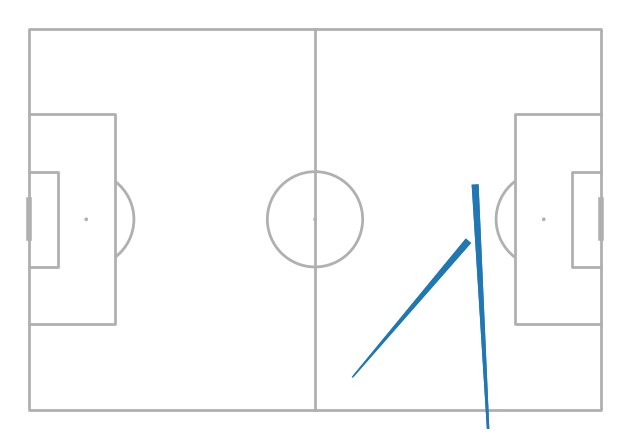

In [ ]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()
pitch.lines(df_progressive.x,df_progressive.y,df_progressive.endX,df_progressive.endY,comet=True,ax=ax)

## Now we are going to calculate expected threat.

https://karun.in/blog/expected-threat.html
En este blog se analiza esta nueva variable que se quiere introducir, para por ejemplo esos pases que igual no son asistencias, pero que generan una ocasión de peligro igualmente.

In [ ]:
 import pandas as pd
 import numpy as np

In [ ]:
df=pd.read_csv('/content/europaFinal.csv')

In [ ]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,0,0.0,Manchester United,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
1,0,0.0,Villarreal,0.0,0.0,FirstHalf,Start,Successful,NaN,NaN,NaN
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
3,0,3.0,Manchester United,32.2,58.1,FirstHalf,Pass,Unsuccessful,2.0,69.6,100.0
4,0,32.0,Villarreal,34.4,0.0,FirstHalf,Pass,Successful,8.0,36.5,9.5


In [ ]:
 df=df.loc[(df['teamId']=='Manchester United') & (df['playerId']==18) & (df['type']=='Pass') & (df['outcome']=='Successful')]

In [ ]:
df.shape

(47, 11)

In [ ]:
df.head(2)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8


In [ ]:
# Cargamos este grid en el que nos divide el campo en franjas con sus respectivos valores para el peligro esperado en cada caso.
xT= pd.read_csv('/content/xT_Grid.csv', header=None)  # xT es expected threat

In [ ]:
xT

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
1,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
2,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
5,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
6,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
7,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926


In [ ]:
xT=np.array(xT)

In [ ]:
xT_rows, xT_cols= xT.shape

In [ ]:
xT_cols

12

In [ ]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,x1_bin,y1_bin,x2_bin,y2_bin
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,5,4,3,4
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,7,7,7,7
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,8,2,9,1
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,10,1,10,1
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,3,5,3,5


### Coges la separación que está hecha en ese csv para las celdas, y la aplicas sobre cada uno de los valores de (x,y) que tienes ahora de forma que cada uno de los pases te queda dentro de un rectángulo de estos.

In [ ]:
# Partimos el campo en 12 columnas y 8 filas.
df['x1_bin']=pd.cut(df['x'], bins=xT_cols, labels=False)
df['y1_bin']=pd.cut(df['y'], bins=xT_rows, labels=False)
df['x2_bin']=pd.cut(df['endX'], bins=xT_cols, labels=False)
df['y2_bin']=pd.cut(df['endY'], bins=xT_rows, labels=False)

In [ ]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,x1_bin,y1_bin,x2_bin,y2_bin
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,5,4,3,4
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,7,7,7,7
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,8,2,9,1
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,10,1,10,1
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,3,5,3,5


## La idea es que a partir de los lugares en que se producen los pases, 'superponemos' nuestro csv que da cuenta de las peligrosidad en cada punto. No sé si es para Bruno Fernandes en concreto, o es algo más general.

In [ ]:
df['start_zone_value']= df[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)
df['end_zone_value']= df[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]],axis=1)

In [ ]:
df.head()

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,5,4,3,4,0.014846,0.011324
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,7,7,7,7,0.017451,0.017451
130,6,55.0,Manchester United,69.8,30.3,FirstHalf,Pass,Successful,18.0,74.4,18.8,8,2,9,1,0.024122,0.029533
133,7,1.0,Manchester United,84.3,23.3,FirstHalf,Pass,Successful,18.0,86.0,20.0,10,1,10,1,0.040670,0.040670
185,12,20.0,Manchester United,39.0,64.8,FirstHalf,Pass,Successful,18.0,32.8,72.9,3,5,3,5,0.011105,0.011105


In [ ]:
# Para sacar la amenaza simplemente restamos la zona final entre la inicial.
df['xT']=df['end_zone_value']-df['start_zone_value']

In [ ]:
df.head(2)

,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,x1_bin,y1_bin,x2_bin,y2_bin,start_zone_value,end_zone_value,xT
2,0,0.0,Manchester United,49.9,50.0,FirstHalf,Pass,Successful,18.0,31.5,59.6,5,4,3,4,0.014846,0.011324,-0.003522
119,6,11.0,Manchester United,65.4,96.8,FirstHalf,Pass,Successful,18.0,63.3,87.8,7,7,7,7,0.017451,0.017451,0.000000


### xT es básicamente la probabilidad de marcar gol desde una determinada zona.